# MSc Thesis - Hugo Stam

#### Investment Strategy Simulation - Adaptive terminal planning in the light of an uncertain future

* [**0. Prepare inputs:**](#0.-Prepare-inputs)<br>
   * [**0.1 Generate demand forecast scenario:**](#0.1-Generate-demand-forecast-scenario)<br>
   * [**0.2 Generate vessels:**](#0.2-Generate-vessels)<br>
* [**1. Instatiate system components:**](#1.-Instatiate-system-components)<br>
* [**2. Start simulation:**](#2.-Strart-simulation)<br>
* [**3. Report all elements:**](#3.-Report-all-elements)<br>

In [1]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import math

from terminal_optimization import container_objects
from terminal_optimization import container_defaults
from terminal_optimization import container_system

# 0. Prepare inputs

In [2]:
startyear = 2020
lifecycle = 15

## 0.1 Generate demand forecast scenario

In [3]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year <= 2025:
        demand.append(500_000)
    elif year <= 2030:
        demand.append(750_000)
    else:
        demand.append(1_000_000)

scenario_data={'year': years, 'volume': demand}

# ladens
container_defaults.container_data['historic_data'] = []
container = container_objects.Commodity(**container_defaults.container_data)
container.scenario_data = pd.DataFrame(data=scenario_data)

# combine
demand = [container]

# plot scenarios 
if False:
    laden.plot_demand()

## 0.2 Generate vessels

In [4]:
# instantiate vessels
handysize = container_objects.Vessel(**container_defaults.handysize_data)
handymax = container_objects.Vessel(**container_defaults.handymax_data)
panamax = container_objects.Vessel(**container_defaults.panamax_data)

vessels = [handysize, handymax, panamax] 

# 1. Instatiate system components

## 1.1 Terminal system

In [5]:
Terminal = container_system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 7500,  
                         debug=True,
                         crane_type_defaults=container_defaults.sts_crane_data)

## 1.2 Terminal system

# 2. Start simulation

This method automatically generates investment decisions, parametrically derived from overall demand trends and a number of investment triggers.

Apply frame of reference style decisions while stepping through each year of the terminal lifecycle and check if investment is needed (in light of strategic objective, operational objective, QSC, decision recipe, intervention method):
    1. for each year evaluate the demand of each commodity (see 0.1 Demand forecast scenario)
    2. for each year evaluate the various investment decisions
    3. for each year calculate the energy costs (requires insight in realized demands)
    4. for each year calculate the demurrage costs (requires insight in realized demands)
    5. for each year calculate terminal revenues
    6. collect all cash flows (capex, opex, revenues)
    7. calculate PV's and aggregate to NPV

In [6]:
Terminal.simulate()

Below, the various investment decisions are evaluated for the year 2020
Simulate year: 2020
  Total vessel calls: 167
     Handysize calls: 0
     Handymax calls: 0
     Panamax calls: 167
  Total cargo volume: 500000
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online (@ start of year): inf
     Crane occupancy planned (@ start of year): inf
     Crane occupancy online (@ start of year): inf
     waiting time factor (@ start of year): inf
     waiting time occupancy (@ start of year): inf
  *** add Berth to elements
     Berth occupancy planned (after adding berth): inf
     Berth occupancy online (after adding berth): inf
  *** add Quay to elements
     Berth occupancy planned (after adding quay): inf
     Berth occupancy online (after adding quay): inf
  *** add STS crane to elements
     Berth 

  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
Below, the various investment decisions are evaluated for the year 2027
Simulate year: 2027
  Total vessel calls: 250
     Handysize calls: 0
     Handymax calls: 0
     Panamax calls: 250
  Total cargo volume: 750000
     a total of 2 Berth_01 is online; 2 total planned
     a total of 1 Quay_01 is online; 2 total planned
     a total of 4 STS_crane is online; 5 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): 0.47735849056603774
     Berth occupancy online (@ start of year): 0.5716981132075472
     Crane occupancy planned (@ start of year): 0.3773584905660377
     Crane occupancy online (@ start of year): 0.4716981132075472
     waiting time factor (@ start of year): 0.16281717335274137


  *** add stack equipment to elements
     Gate capacity planned (@ start of year): 240
     Gate capacity online (@ start of year): 240
     Service rate planned (@ start of year): 0.9014888337468981
     Gate lane minutes  (@ start of year): 216.35732009925556
     Empty handlers online (@ start of year): 30
Below, the various investment decisions are evaluated for the year 2033
Simulate year: 2033
  Total vessel calls: 334
     Handysize calls: 0
     Handymax calls: 0
     Panamax calls: 334
  Total cargo volume: 1000000
     a total of 2 Berth_01 is online; 2 total planned
     a total of 2 Quay_01 is online; 2 total planned
     a total of 6 STS_crane is online; 6 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): 0.5537257861635221
     Berth occupancy online (@ start of year): 0.5537257861635221
     Crane occupancy planned (@ start of year): 0.42012578616352203
     Crane occupancy online (@ start of year): 0.42012578616352203
     waiting time fa

(-309083695.87872356,
 {'equipment': 'rs',
  'cost_land': 0,
  'cost_fuel': 1,
  'cost_power': 0.17,
  'land': 304046.30000000016,
  'labour': 21585000.0,
  'opex': 39627651.313977666,
  'capex': 253925952.0,
  'NPV': -309083695.87872356})

## 3. Report all elements

In [7]:
if True: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)


Laden

{'historic_data': [], 'scenario_data':     year   volume
0   2020   500000
1   2021   500000
2   2022   500000
3   2023   500000
4   2024   500000
5   2025   500000
6   2026   750000
7   2027   750000
8   2028   750000
9   2029   750000
10  2030   750000
11  2031  1000000
12  2032  1000000
13  2033  1000000
14  2034  1000000, 'handling_fee': 150, 'handysize_perc': 0, 'handymax_perc': 0, 'panamax_perc': 100, 'name': 'Laden', 'id': '4857d35a-a70e-11e9-b616-0050b697a632'}

Handysize_1

{'type': 'Handysize', 'call_size': 35000, 'LOA': 130, 'draft': 10, 'beam': 24, 'max_cranes': 2, 'all_turn_time': 24, 'mooring_time': 3, 'demurrage_rate': 600, 'name': 'Handysize_1', 'id': '4858ff68-a70e-11e9-975d-0050b697a632'}

Handymax_1

{'type': 'Handymax', 'call_size': 55000, 'LOA': 180, 'draft': 11.5, 'beam': 28, 'max_cranes': 2, 'all_turn_time': 24, 'mooring_time': 3, 'demurrage_rate': 750, 'name': 'Handymax_1', 'id': '4858ff69-a70e-11e9-af7e-0050b697a632'}

Panamax_1

{'type': 'Panamax', 'ca

14  2034        0.0     116280.0  53078.784965}

RS Stack

{'land_use': 4651.2, 'triggers': [], 'capex': 1312800, 'labour': [], 'maintenance': 116280, 'energy': [], 'insurance': [], 'lease': [], 'demurrage': [], 'residual': [], 'fuel': [], 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 40, 'mobilisation': 10000, 'maintenance_perc': 0.1, 'width': 4, 'height': 4, 'length': 20, 'capacity': 320, 'gross_tgs': 18, 'area_factor': 3.23, 'pavement': 200, 'drainage': 50, 'household': 0.1, 'digout_margin': 1.2, 'reefer_factor': 2.33, 'consumption': 4, 'reefer_rack': 3500, 'reefers_present': 0.5, 'year_purchase': [], 'year_online': 2027, 'name': 'RS Stack', 'id': '48a75a22-a70e-11e9-84a4-0050b697a632', 'df':     year      capex  maintenance        energy
0   2020        0.0          0.0      0.000000
1   2021        0.0          0.0      0.000000
2   2022        0.0          0.0      0.000000
3   2023        0.0          0.0      0.000000
4   2024        0.0          0.0      0.

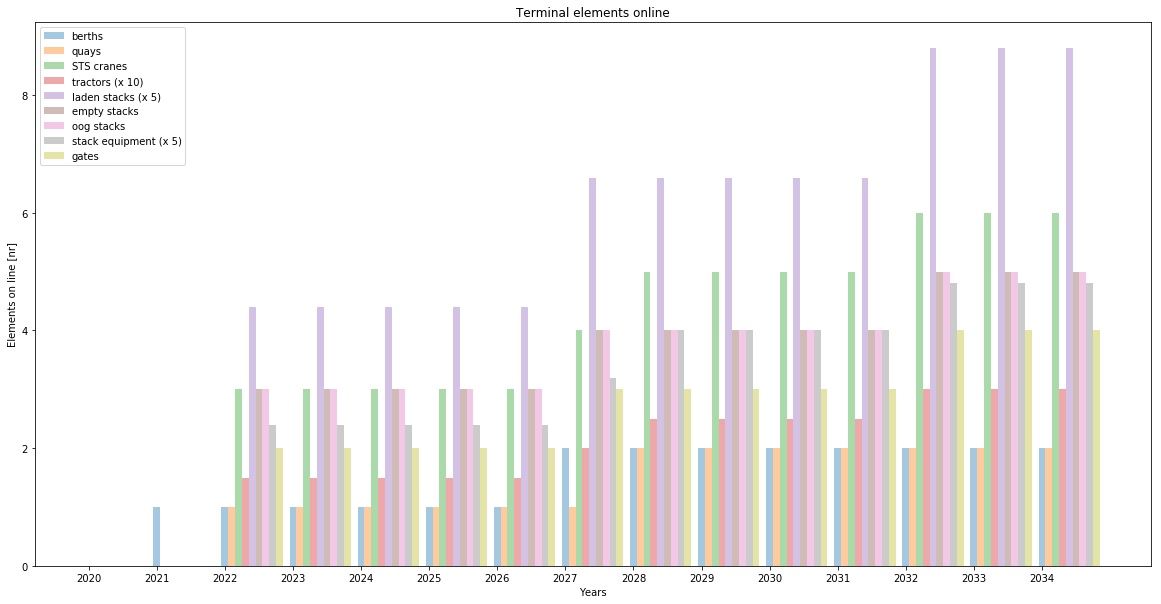

In [8]:
Terminal.terminal_elements_plot()

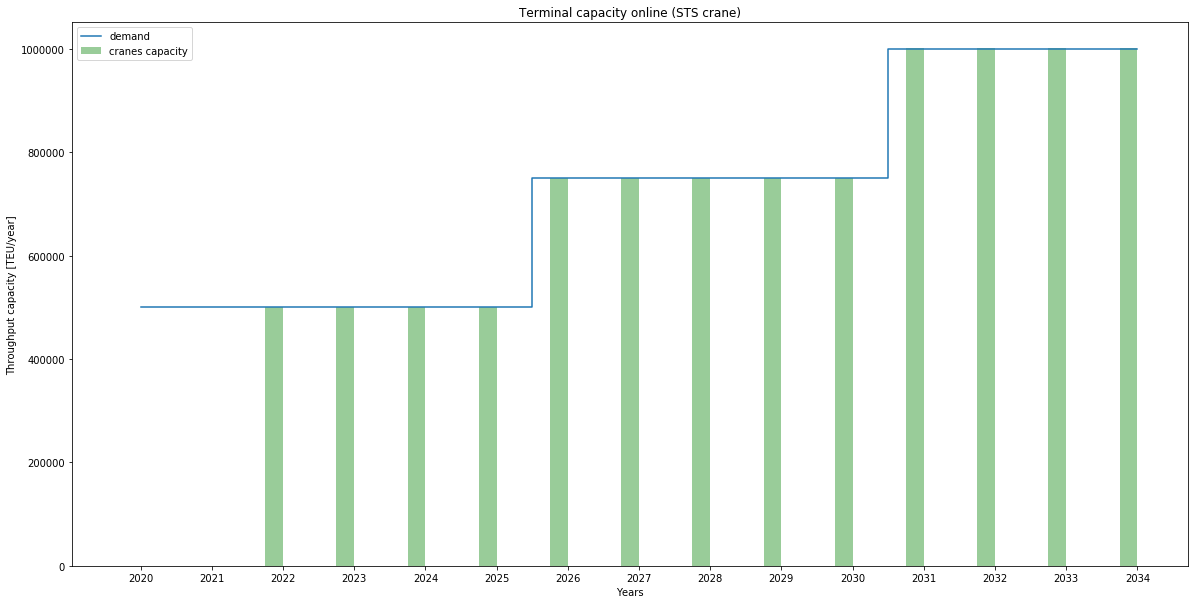

In [9]:
Terminal.terminal_capacity_plot()

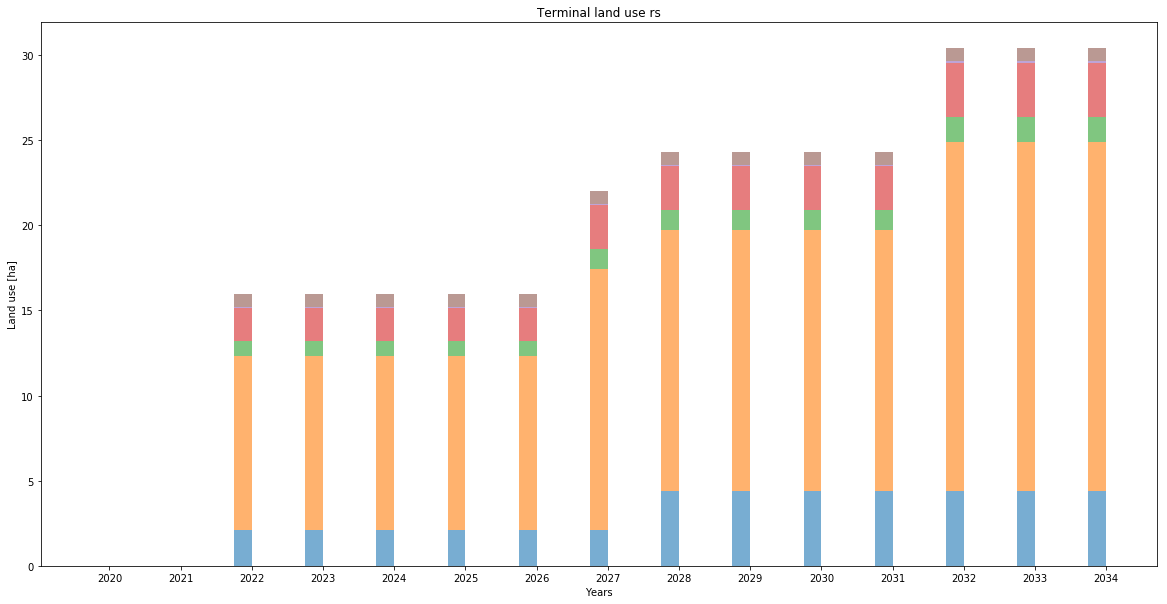

In [10]:
Terminal.land_use_plot()

In [11]:
# Terminal.laden_stack_area_plot()

#### Add cash flow information for each of the terminal elements.

In [12]:
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

    year        capex  maintenance   insurance        energy      labour  \
0   2020   16195584.0         0.00        0.00  0.000000e+00         NaN   
1   2021  124915230.0         0.00        0.00  0.000000e+00         NaN   
2   2022          0.0   4975691.40   518726.40  2.903540e+06  10792500.0   
3   2023          0.0   4975691.40   518726.40  2.903540e+06  10792500.0   
4   2024          0.0   4975691.40   518726.40  2.903540e+06  10792500.0   
5   2025          0.0   4975691.40   518726.40  2.903540e+06  10792500.0   
6   2026   53631605.4   4975691.40   518726.40  3.704255e+06  12272500.0   
7   2027   25696145.6   7039311.40   618726.40  3.714589e+06  16085000.0   
8   2028          0.0   7721726.92   958641.92  3.718497e+06  18397500.0   
9   2029          0.0   7721726.92   958641.92  3.718497e+06  18397500.0   
10  2030          0.0   7721726.92   958641.92  3.718497e+06  18397500.0   
11  2031   33487387.0   7721726.92   958641.92  4.519212e+06  18397500.0   
12  2032    

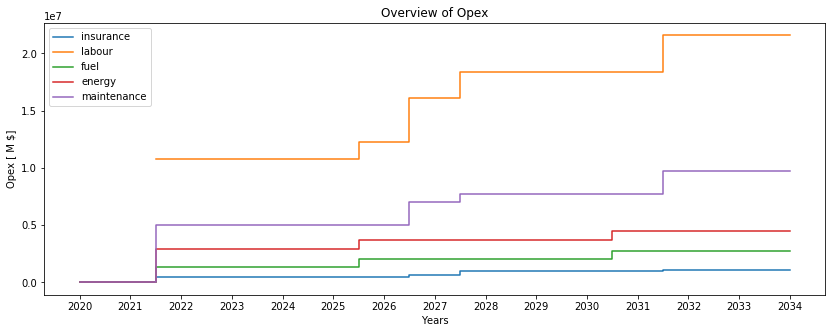

In [13]:
# Terminal.capex_plot(cash_flows)
Terminal.opex_plot(cash_flows)

-309083695.87872356
-309083695.87872356


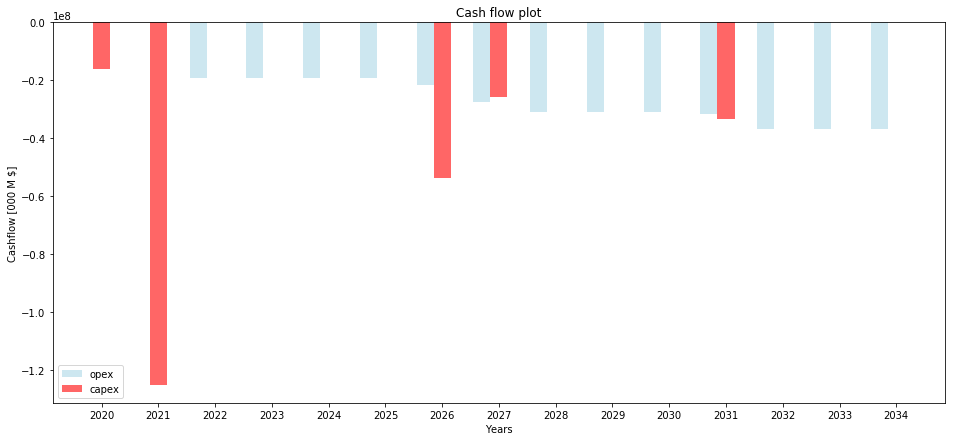

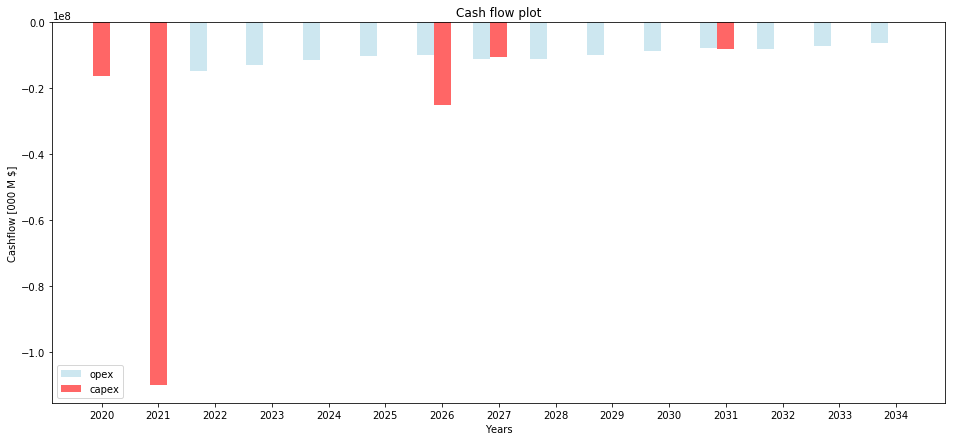

In [14]:
Terminal.cashflow_plot(cash_flows)
Terminal.cashflow_plot(cash_flows_WACC_real)

In [15]:
Terminal.NPV()

(-309083695.87872356,
 array([1.61955840e+07, 1.24915230e+08, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.36316054e+07, 2.56961456e+07,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.34873870e+07,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([              nan,               nan, 20550016.14048883,
        20550016.14048883, 20550016.14048883, 20550016.14048883,
        23510509.79123325, 29496964.01473325, 32835703.43973325,
        32835703.43973325, 32835703.43973325, 34316197.09047767,
        39627651.31397767, 39627651.31397767, 39627651.31397767]),
 array([      nan,       nan, 10792500., 10792500., 10792500., 10792500.,
        12272500., 16085000., 18397500., 18397500., 18397500., 18397500.,
        21585000., 21585000., 21585000.]))